In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Source : https://dataunodc.un.org/dp-crime-corruption-offences <br>
Variables : https://dataunodc.un.org/sites/dataunodc.un.org/files/metadata_corruption_and_economic_crime.pdf <br>
Measurement unit: Rate per 100,000 population (R𝑎𝑡𝑒 = 100,000∗ 𝑂𝑓𝑓𝑒𝑛𝑐𝑒𝑠/ 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜n)<br>
Countries: Used the same that were in the notebook joined_data
<br>
<br>
Corruption -> Unlawful acts as defined in the United Nations Convention against Corruption and other national and international legal instruments against corruption. <br>
<br>
Corruption: Bribery ->  Promising, offering, giving, soliciting, or accepting an undue advantage to or from a public official or a person who directs or works in a private sector entity, directly or indirectly, in order that the person act or refrain from acting in the exercise of his or her official duties<br>
<br>
Corruption: Other acts of corruption ->  Other acts of corruption includes embezzlement, abuse of functions, trading in influence, illicit enrichment and all other acts of corruption not mentioned above. <br>
<br>
Fraud -> Conversion or transfer of property, knowing that such property is the proceeds of crime, for the purpose of concealing or disguising the illicit origin of such property or of helping any person who is involved in the commission of the predicate offence to evade the legal  consequences of his or her actions, as well as the concealment or disguise of the true nature, source, location, disposition, movement or ownership of rights with respect to the property.<br>
<br>
Money laundering -> Conversion or transfer of property, knowing that such property is the proceeds of crime, for the purpose of concealing or disguising the illicit origin of such property or of helping any person who is involved in the commission of the predicate offence to evade the legal consequences of his or her actions, as well as the concealment or disguise of the true nature, source, location, disposition, movement or ownership of rights with respect to the property.<br>


In [18]:
un_data = pd.read_excel("../data/raw/un_corruption.xlsx")
un_data.columns = un_data.iloc[1]
un_data = un_data[2:].reset_index(drop=True)
un_data["year"] = pd.to_numeric(un_data["Year"])
un_data["VALUE"] = pd.to_numeric(un_data["VALUE"])
un_data=un_data[(un_data['Indicator']=='Offences')
                 & (un_data["year"] >= 2012) & (un_data["year"] <= 2022)
                 & (un_data['Unit of measurement']=='Rate per 100,000 population') #Can be count or Rate per 100,000 population
                 ]
un_data.drop(columns=["Dimension", "Sex",	"Age"	,
                      "Source", "Region", "Indicator",
                      "Year", "Unit of measurement", "Iso3_code",
                      "Subregion"], inplace=True) #Subregion 

In [19]:
un_data

1,Country,Category,VALUE,year
11377,Armenia,Corruption,26.952645,2013
11378,Austria,Corruption,40.556450,2013
11379,Switzerland,Corruption,60.383017,2013
11380,Chile,Corruption,1.936045,2013
11381,Colombia,Corruption,50.787308,2013
...,...,...,...,...
21579,Singapore,Unlawful interception or access of computer data,0.100992,2021
21580,El Salvador,Unlawful interception or access of computer data,0.000000,2021
21581,Serbia,Unlawful interception or access of computer data,0.000000,2021
21582,Slovakia,Unlawful interception or access of computer data,0.385489,2021


In [4]:
un_data[un_data["VALUE"]==0] #417 0/missing, diferentes anos

1,Country,Category,VALUE,year
11409,Barbados,Corruption,0.0,2014
11421,Grenada,Corruption,0.0,2014
11451,Barbados,Corruption,0.0,2015
11464,Grenada,Corruption,0.0,2015
11500,Barbados,Corruption,0.0,2016
...,...,...,...,...
21559,Cyprus,Unlawful interception or access of computer data,0.0,2021
21572,Latvia,Unlawful interception or access of computer data,0.0,2021
21580,El Salvador,Unlawful interception or access of computer data,0.0,2021
21581,Serbia,Unlawful interception or access of computer data,0.0,2021


In [5]:
country_mapping = {
    'Netherlands (Kingdom of the)': "Netherlands",
    'United Kingdom (England and Wales)': "United Kingdom"

}
un_data["Country"] = un_data["Country"].replace(country_mapping)

your_data = un_data
mapping_data = pd.read_csv('../data/processed/merged_.csv')

your_data_countries = set(your_data['Country'])
mapping_countries = set(mapping_data['country'])


# Find countries in your data that are not in the mapping file
countries_not_in_mapping = your_data_countries - mapping_countries
filtered_data = your_data[~your_data['Country'].isin(countries_not_in_mapping)].reset_index(drop=True)

In [6]:
filtered_data

1,Country,Category,VALUE,year
0,Austria,Corruption,40.556450,2013
1,Switzerland,Corruption,60.383017,2013
2,Cyprus,Corruption,2.227994,2013
3,Germany,Corruption,8.606696,2013
4,Denmark,Corruption,26.735948,2013
...,...,...,...,...
3280,Malta,Unlawful interception or access of computer data,11.960178,2021
3281,Poland,Unlawful interception or access of computer data,12.979105,2021
3282,Portugal,Unlawful interception or access of computer data,6.141824,2021
3283,Romania,Unlawful interception or access of computer data,0.496674,2021


In [7]:
pivoted_data = filtered_data.pivot(index=['Country', 'year'], columns='Category', values='VALUE')
pivoted_data = pivoted_data.reset_index()
pivoted_data.columns.name = None
pivoted_data

,Country,year,Burglary,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Fraud: Cyber-related (Cy),Money laundering,Smuggling of migrants,Theft,Theft: of a motorized vehicle,Unlawful access to a computer system,Unlawful interception or access of computer data,Unlawful interference with a computer system or computer data
0,Albania,2012,11.133420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.773284,23.407843,NaN,NaN,NaN
1,Albania,2013,12.642821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.021978,19.812859,NaN,NaN,NaN
2,Albania,2014,10.228487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.030459,13.903808,NaN,NaN,NaN
3,Albania,2015,8.013930,35.906568,7.424160,28.482408,25.533559,1.769309,11.830087,NaN,243.262662,9.609777,0.173462,0.0,1.387693
4,Albania,2016,NaN,35.820112,8.885609,26.934503,31.689692,1.770180,12.668935,2.186693,195.795788,10.343405,0.416513,0.0,2.499078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,United Kingdom,2017,745.004711,NaN,NaN,NaN,1086.666782,NaN,NaN,NaN,2677.699965,190.694991,7.180235,NaN,0.553242
392,United Kingdom,2018,715.324728,NaN,NaN,NaN,1172.982340,NaN,NaN,NaN,2694.927173,203.184228,NaN,NaN,NaN
393,United Kingdom,2019,645.883300,NaN,NaN,NaN,1303.058689,NaN,NaN,NaN,NaN,200.056057,NaN,NaN,NaN
394,United Kingdom,2020,448.128327,NaN,NaN,NaN,1387.086116,NaN,NaN,NaN,NaN,156.847677,NaN,NaN,NaN


In [8]:
pivoted_data.drop(columns=["Burglary", "Theft: of a motorized vehicle",
                           "Theft", "Smuggling of migrants",
                           "Unlawful interception or access of computer data",
                           "Unlawful interference with a computer system or computer data",
                           "Fraud: Cyber-related (Cy)",
                           "Unlawful access to a computer system"], inplace=True)

In [9]:
pivoted_data.to_csv("../data/processed/un_data.csv", index=False, index_label=False)

In [10]:
pivoted_data.isna().sum()

Country                                   0
year                                      0
Corruption                              111
Corruption: Bribery                     127
Corruption: Other acts of corruption    171
Fraud                                   106
Money laundering                        135
dtype: int64

In [11]:
columns_to_use = [
    'Corruption', 
    'Corruption: Bribery', 
    'Corruption: Other acts of corruption', 
    'Fraud', 
    'Money laundering'
]

# Drop rows with missing values in these columns
df_clean = pivoted_data.dropna(subset=columns_to_use)

# Extract features for clustering
X = df_clean[columns_to_use]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Analyze clusters
cluster_analysis = df_clean.groupby('Cluster')[columns_to_use].mean()
print(cluster_analysis)

         Corruption  Corruption: Bribery  \
Cluster                                    
0         55.191551             1.139262   
1         11.465423             1.646994   
2         25.708008            12.642711   
3        204.503549             2.490738   

         Corruption: Other acts of corruption        Fraud  Money laundering  
Cluster                                                                       
0                                   53.782814   553.906018         10.523258  
1                                    9.823811   199.230340          5.156344  
2                                   13.163287   130.995971          7.039362  
3                                  202.012811  2495.132857         66.985059  


C:\Users\marga\AppData\Local\Temp\ipykernel_18960\7452300.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [12]:
country_year_by_cluster = df_clean.groupby('Cluster')[['Country', 'year']].apply(
    lambda x: x.apply(tuple, axis=1).tolist()
)
for item in country_year_by_cluster:

    print(item)

[('Austria', 2013), ('Austria', 2014), ('Austria', 2016), ('Austria', 2017), ('Austria', 2018), ('Austria', 2019), ('Austria', 2020), ('Austria', 2021), ('Austria', 2022), ('Belgium', 2015), ('Belgium', 2016), ('Belgium', 2017), ('Belgium', 2018), ('Belgium', 2019), ('Belgium', 2020), ('Denmark', 2014), ('Denmark', 2015), ('Denmark', 2016), ('Denmark', 2017), ('Denmark', 2018), ('Denmark', 2019), ('Denmark', 2020), ('Denmark', 2021), ('Denmark', 2022), ('Finland', 2014), ('Finland', 2015), ('Finland', 2016), ('Finland', 2017), ('Finland', 2018), ('Finland', 2019), ('Finland', 2020), ('Finland', 2021), ('Finland', 2022), ('Lithuania', 2013), ('Lithuania', 2014), ('Lithuania', 2015), ('Montenegro', 2018), ('Montenegro', 2022), ('Slovenia', 2013), ('Slovenia', 2014), ('Slovenia', 2015), ('Sweden', 2013), ('Sweden', 2014), ('Switzerland', 2013), ('Switzerland', 2014), ('Switzerland', 2015), ('Switzerland', 2016), ('Switzerland', 2017)]
[('Albania', 2020), ('Austria', 2015), ('Bosnia and He

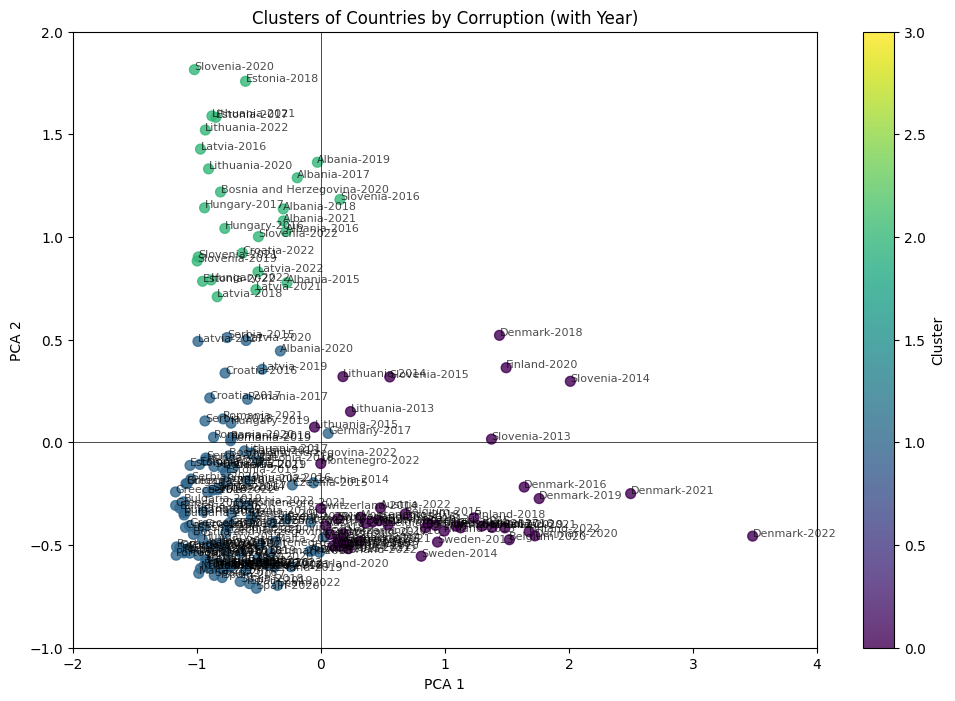

In [13]:
plt.figure(figsize=(12, 8))
# Scatter plot with cluster colors
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=df_clean['Cluster'], cmap='viridis', s=50, alpha=0.8
)

# Annotate each point with the Country-Year combination
for i, (country, year) in enumerate(zip(df_clean['Country'], df_clean['year'])):
    plt.annotate(f"{country}-{year}", (X_pca[i, 0], X_pca[i, 1]),
                 fontsize=8, alpha=0.7)

# Add a colorbar and labels
plt.colorbar(label='Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters of Countries by Corruption (with Year)')
plt.xlim(-2, 4)  # Adjust x-axis limits
plt.ylim(-1, 2)  # Adjust y-axis limits
plt.axhline(0, color='black',linewidth=0.5)  # horizontal line at y=0
plt.axvline(0, color='black',linewidth=0.5)  # vertical line at x=0
plt.show()

In [14]:
loadings = pd.DataFrame(
    pca.components_, 
    columns=columns_to_use, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
print("PCA Loadings:")
print(loadings)

PCA Loadings:
     Corruption  Corruption: Bribery  Corruption: Other acts of corruption  \
PC1    0.525699            -0.053418                              0.531386   
PC2    0.146703             0.986636                              0.012680   

        Fraud  Money laundering  
PC1  0.508407          0.424192  
PC2 -0.069125          0.009402  
